# Model Building

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Ameng\\Data Science Project\\breast-cancer-prediciton\\data\\processed\\final_scaled.csv")

In [3]:
df.head()

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train-Test Split

In [4]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     
    random_state=42,    
    stratify=y          
)

In [6]:
print(f"\nTraining set: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

print(f"\nClass distribution in test set:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True) * 100)


Training set: (455, 23) (80.0%)
Test set: (114, 23) (20.0%)

Class distribution in training set:
diagnosis
0    285
1    170
Name: count, dtype: int64
diagnosis
0    62.637363
1    37.362637
Name: proportion, dtype: float64

Class distribution in test set:
diagnosis
0    72
1    42
Name: count, dtype: int64
diagnosis
0    63.157895
1    36.842105
Name: proportion, dtype: float64


## Build Model

In [7]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

In [8]:
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    print(f"✓ {name} trained")


Training Logistic Regression...
✓ Logistic Regression trained

Training Decision Tree...
✓ Decision Tree trained

Training Random Forest...
✓ Random Forest trained

Training Gradient Boosting...
✓ Gradient Boosting trained

Training SVM...
✓ SVM trained

Training KNN...
✓ KNN trained

Training Naive Bayes...
✓ Naive Bayes trained


## Compare Model Performance

In [9]:
df_results = pd.DataFrame(results).T
df_results_sorted = df_results.sort_values(by='F1-Score', ascending=False)
df_results_sorted

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.964912,1.000000,0.904762,0.950000,0.998016
Gradient Boosting,0.964912,1.000000,0.904762,0.950000,0.998016
Decision Tree,0.956140,0.974359,0.904762,0.938272,0.945437
Logistic Regression,0.807018,0.750000,0.714286,0.731707,0.864418
KNN,0.728070,0.720000,0.428571,0.537313,0.755291
SVM,0.631579,0.000000,0.000000,0.000000,0.381614
Naive Bayes,0.622807,0.000000,0.000000,0.000000,0.925595


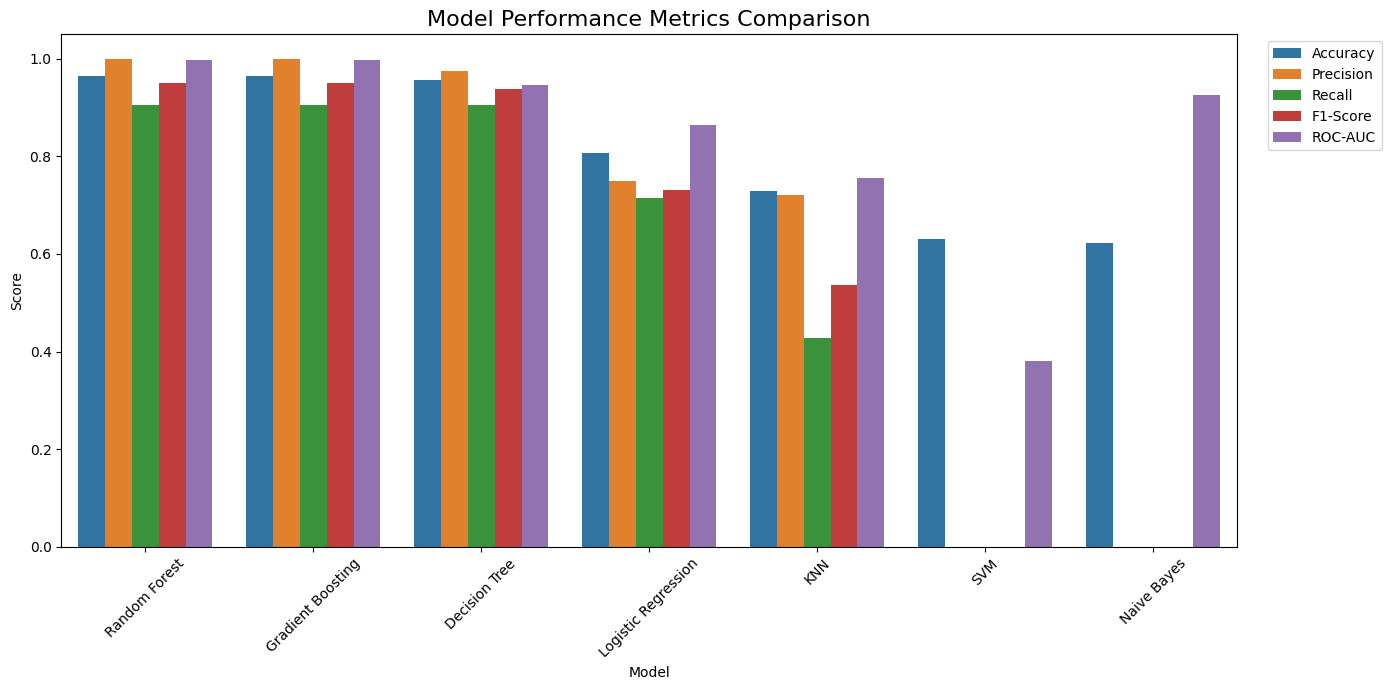

BEST MODEL: Random Forest
F1-Score: 0.9500
Accuracy: 0.9649


In [14]:
df_melted = df_results_sorted.reset_index().rename(columns={'index': 'Model'})

df_melted = pd.melt(
    df_melted, 
    id_vars='Model',          
    var_name='Metric',        
    value_name='Score'        
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_melted,
    x='Model',
    y='Score',
    hue='Metric'  
)

plt.title('Model Performance Metrics Comparison', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

best_model_name = df_results['F1-Score'].idxmax()
print(f"BEST MODEL: {best_model_name}")
print(f"F1-Score: {df_results.loc[best_model_name, 'F1-Score']:.4f}")
print(f"Accuracy: {df_results.loc[best_model_name, 'Accuracy']:.4f}")

## Confusion Matrix

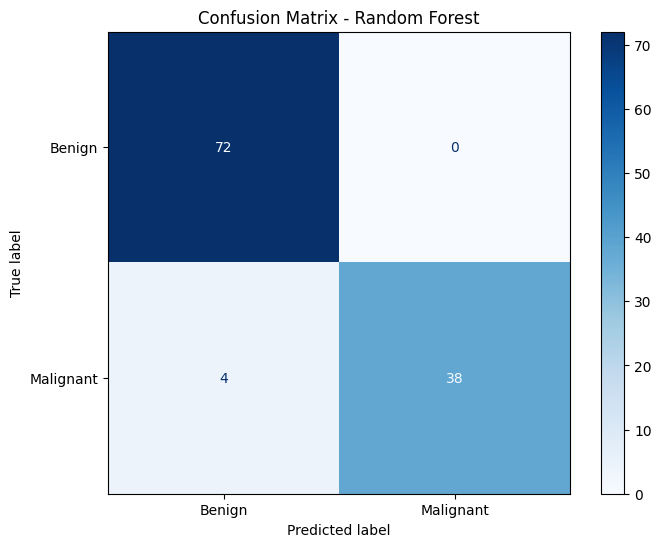

True Negatives (TN): 72 - Correctly identified benign cases
False Positives (FP): 0 - Benign cases incorrectly flagged as malignant
False Negatives (FN): 4 - CRITICAL: Missed cancer cases!
True Positives (TP): 38 - Correctly identified malignant cases


In [19]:
best_model = trained_models[best_model_name]

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,  
    y_test,
    cmap='Blues',  
    display_labels=['Benign', 'Malignant'],
    ax=ax          
)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn} - Correctly identified benign cases")
print(f"False Positives (FP): {fp} - Benign cases incorrectly flagged as malignant")
print(f"False Negatives (FN): {fn} - CRITICAL: Missed cancer cases!")
print(f"True Positives (TP): {tp} - Correctly identified malignant cases")

## Feature Importance